# ALL_Clustering Algorithms

In [32]:
#Fuzzy c-means (FCM) is a method of clustering which allows one piece of data to belong to two or more clusters. 
#Each data point has a degree of membership (or probability) of belonging to each cluster.

In [33]:
#import the libraries
import numpy as np 
import pandas as pd
import matplotlib .pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [34]:
#Read Data
data = r'C:\Users\ridfar8w\Downloads\IDT_Master (1) (1).csv'
df = pd.read_csv(data)
df.shape

(4373, 53)

In [35]:
df.describe()

,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,width_x,...,output_total_net_capacitance_fall,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,...,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,2.655756,14.725086,14.441002,10.549531,10.930208,12.775417,12.911617,4.134233,0.382772,0.664535,...,1.461683,66.923775,65.238459,27.166252,27.086228,17.599124,17.965576,17.599124,17.965576,16.157735
std,2.836449,7.699834,7.552013,4.756208,4.887094,7.184952,7.603760,0.826179,0.201558,0.349927,...,1.755669,83.313026,79.494545,17.793667,19.075738,9.081383,8.879963,9.081383,8.879963,18.511258
min,0.000000,0.000000,0.000000,3.900000,3.600000,2.100000,2.100000,2.000000,0.207360,0.360000,...,0.000000,0.822000,0.823000,2.780000,2.761000,2.756000,2.788000,2.756000,2.788000,-31.536000
25%,0.540000,9.100000,9.100000,7.100000,7.300000,7.700000,7.600000,4.000000,0.259200,0.450000,...,0.630000,14.090000,13.712000,13.364000,13.025000,10.563000,11.754000,10.563000,11.754000,3.033000
50%,2.060000,14.800000,13.700000,9.600000,9.800000,10.800000,10.600000,4.000000,0.311040,0.540000,...,0.982000,34.150000,34.045000,19.304000,18.311000,16.062000,16.964000,16.062000,16.964000,8.911000
75%,3.860000,17.600000,17.600000,12.600000,13.700000,16.200000,16.400000,5.000000,0.414720,0.720000,...,1.797000,73.242000,72.059000,40.532000,35.930000,22.029000,21.895000,22.029000,21.895000,26.015000
max,31.290000,56.200000,56.200000,52.600000,56.100000,49.700000,49.700000,5.000000,0.933120,1.620000,...,28.506000,351.493000,326.999000,155.992000,191.084000,107.414000,143.341000,107.414000,143.341000,184.184000


In [36]:
#Convert data from string to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['to_pin'])
le.transform(df['to_pin'])
df['to_pin'] = le.transform(df['to_pin'])

In [37]:
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,output_total_net_capacitance_fall,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate
0,1601,0.54,11.7,11.0,11.8,7.5,8.3,8.3,5,0.31104,...,0.561,12.250,13.028,16.418,18.311,10.129,7.620,10.129,7.620,5.811
1,1601,0.54,12.0,12.5,10.0,12.5,10.2,10.2,5,0.31104,...,0.561,16.817,16.275,16.418,18.311,10.699,13.252,10.699,13.252,5.011
2,1601,0.54,8.5,8.5,10.9,13.3,9.9,9.9,5,0.31104,...,0.561,29.316,27.434,16.418,18.311,13.032,14.944,13.032,14.944,8.911
3,1602,1.96,9.5,10.0,11.0,9.4,7.8,7.8,4,0.25920,...,0.885,12.567,11.597,12.250,13.028,9.388,6.749,9.388,6.749,1.328
4,1602,1.96,12.0,12.5,8.5,11.7,8.0,8.0,4,0.25920,...,0.885,16.817,16.275,12.250,13.028,9.160,10.573,9.160,10.573,1.928


In [38]:
#Scaling the data
scalarModel = StandardScaler()
df = scalarModel.fit_transform(df)


In [39]:
#Apply Fuzzy C Means Algorithm
fcmModel = FCM(n_clusters = 9)
fcmModel.fit(df)
center = fcmModel.centers
center

array([[ 3.92501423e-01, -4.14897536e-01, -4.45990012e-01,
        -4.57557143e-01, -4.41162646e-01, -5.36154735e-01,
         4.32999858e-01,  4.04710529e-01,  6.81993093e-01,
         1.88801895e-01,  1.88801895e-01,  1.11022302e-16,
         0.00000000e+00,  1.88201442e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         3.28926157e-01, -1.75263622e-01,  0.00000000e+00,
         0.00000000e+00,  6.85464089e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.87140457e-01, -1.36252284e-01, -1.02970751e-01,
        -1.01301813e-01,  0.00000000e+00,  0.00000000e+00,
        -1.13284145e+00,  1.13284145e+00, -2.55266241e-01,
        -2.59607138e-01, -2.54481571e-01, -2.58902126e-01,
        -2.54481571e-01, -2.54481571e-01, -3.32581166e-01,
        -3.36764451e-01, -6.18000301e-01, -6.16594858e-01,
         1.87247365e-01,  7.55170975e-02,  1.87247365e-0

In [40]:
labels = fcmModel.predict(df)
print('Predicted Value for fcmModel is : ' , labels)
labels.shape

Predicted Value for fcmModel is :  [4 6 6 ... 6 6 4]


(4373,)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.array(list(map(np.int, x)))

x = np.arange(labels.any())

In [42]:
import numpy as np
np.append(labels, 53)

array([ 4,  6,  6, ...,  6,  4, 53], dtype=int64)

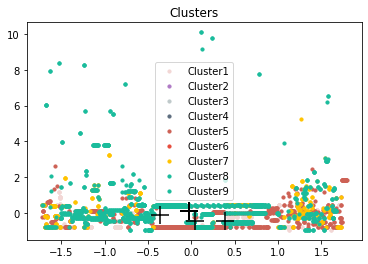

In [43]:
#Draw the data and Clusters
Niveau1=plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = '#F2D7D5')
Niveau2=plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = '#AF7AC5' )
Niveau3=plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = '#BFC9CA' )
Niveau4=plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = '#5D6D7E' )
Niveau5=plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = '#CD6155' )
Niveau6=plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = '#E74C3C' )
Niveau7=plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = '#FFC300' )
Niveau8=plt.scatter(df[labels == 7, 0], df[labels == 7, 1], s = 10, c = '#1ABC9C' )
Niveau9=plt.scatter(df[labels == 8, 0], df[labels == 8, 1], s = 10, c = '#1ABC9C' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters')
plt.legend([Niveau1, Niveau2, Niveau3,Niveau4, Niveau5, Niveau6,Niveau7, Niveau8, Niveau9], ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9'])
plt.show()
 

In [44]:
df = pd.read_csv(data)
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,output_total_net_capacitance_fall,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate
0,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,11.7,11.0,11.8,7.5,8.3,8.3,5,0.31104,...,0.561,12.250,13.028,16.418,18.311,10.129,7.620,10.129,7.620,5.811
1,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,12.0,12.5,10.0,12.5,10.2,10.2,5,0.31104,...,0.561,16.817,16.275,16.418,18.311,10.699,13.252,10.699,13.252,5.011
2,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,8.5,8.5,10.9,13.3,9.9,9.9,5,0.31104,...,0.561,29.316,27.434,16.418,18.311,13.032,14.944,13.032,14.944,8.911
3,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,9.5,10.0,11.0,9.4,7.8,7.8,4,0.25920,...,0.885,12.567,11.597,12.250,13.028,9.388,6.749,9.388,6.749,1.328
4,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,12.0,12.5,8.5,11.7,8.0,8.0,4,0.25920,...,0.885,16.817,16.275,12.250,13.028,9.160,10.573,9.160,10.573,1.928


In [45]:
df['labels'] = labels

In [46]:
#Sort the data with the labels column
df.sort_values(["labels"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

In [47]:
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate,labels
315,i_2_0_49/S,4.90,9.8,9.8,23.5,23.3,38.7,38.8,5,0.93312,...,13.083,12.604,15.562,15.233,33.099,18.947,33.099,18.947,1.833,8
378,i_2_0_60/CO,1.49,8.4,9.6,10.9,10.8,21.8,21.8,5,0.93312,...,13.270,14.506,10.821,10.659,23.038,21.107,23.038,21.107,2.659,8
372,i_2_0_59/CO,6.82,9.8,9.8,17.8,17.8,29.2,29.2,5,0.93312,...,12.743,12.351,16.228,16.088,26.431,24.268,26.431,24.268,-4.512,8
373,i_2_0_59/S,3.94,9.8,9.8,20.8,20.6,36.8,37.2,5,0.93312,...,12.743,12.351,12.306,12.304,30.227,16.777,30.227,16.777,1.504,8
374,i_2_0_60/CO,1.49,0.0,0.0,10.9,10.8,21.0,21.0,5,0.93312,...,0.931,0.930,10.821,10.659,20.520,21.007,20.520,21.007,2.759,8


In [48]:
#Add the result to a new csv
from pathlib import Path 
filepath = Path('C:/Users/ridfar8w/Downloads/FuzzyCMeansAll.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [19]:
#Meanshift is falling under the category of a clustering algorithm in contrast of Unsupervised learning that assigns the data points to the clusters iteratively 
#by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift)

In [20]:
#import the libraries
import numpy as np 
import pandas as pd 
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from itertools import cycle

In [21]:
#Read Data
data = r'C:\Users\ridfar8w\Downloads\IDT_Master (1) (1).csv'
df = pd.read_csv(data)
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,output_total_net_capacitance_fall,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate
0,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,11.7,11.0,11.8,7.5,8.3,8.3,5,0.31104,...,0.561,12.250,13.028,16.418,18.311,10.129,7.620,10.129,7.620,5.811
1,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,12.0,12.5,10.0,12.5,10.2,10.2,5,0.31104,...,0.561,16.817,16.275,16.418,18.311,10.699,13.252,10.699,13.252,5.011
2,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,8.5,8.5,10.9,13.3,9.9,9.9,5,0.31104,...,0.561,29.316,27.434,16.418,18.311,13.032,14.944,13.032,14.944,8.911
3,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,9.5,10.0,11.0,9.4,7.8,7.8,4,0.25920,...,0.885,12.567,11.597,12.250,13.028,9.388,6.749,9.388,6.749,1.328
4,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,12.0,12.5,8.5,11.7,8.0,8.0,4,0.25920,...,0.885,16.817,16.275,12.250,13.028,9.160,10.573,9.160,10.573,1.928


In [22]:
#Choose the dependent variables
X = df['error_rate'].values

print(X)

[ 5.811  5.011  8.911 ... 16.856 22.256 27.259]


In [23]:
X = X.reshape(-1, 1)

In [24]:
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,output_total_net_capacitance_fall,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate
0,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,11.7,11.0,11.8,7.5,8.3,8.3,5,0.31104,...,0.561,12.250,13.028,16.418,18.311,10.129,7.620,10.129,7.620,5.811
1,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,12.0,12.5,10.0,12.5,10.2,10.2,5,0.31104,...,0.561,16.817,16.275,16.418,18.311,10.699,13.252,10.699,13.252,5.011
2,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,0.54,8.5,8.5,10.9,13.3,9.9,9.9,5,0.31104,...,0.561,29.316,27.434,16.418,18.311,13.032,14.944,13.032,14.944,8.911
3,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,9.5,10.0,11.0,9.4,7.8,7.8,4,0.25920,...,0.885,12.567,11.597,12.250,13.028,9.388,6.749,9.388,6.749,1.328
4,ldet_shrink2v_inst_ldet_shrink2v_core_inst_lde...,1.96,12.0,12.5,8.5,11.7,8.0,8.0,4,0.25920,...,0.885,16.817,16.275,12.250,13.028,9.160,10.573,9.160,10.573,1.928


In [25]:
# Calculate the estimated number of clusters 
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9


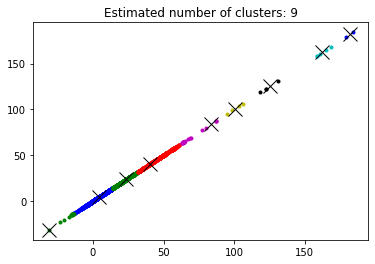

In [26]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 0], col + '.')
    plt.plot(cluster_center[0], cluster_center[0], 'x', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [27]:
#Create a new column for clusters
df['labels'] = labels

In [28]:
#Sort the data with the labels column
df.sort_values(["labels"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

In [29]:
df.head()

,to_pin,output_capa,input_slew_rise_x,input_slew_fall_x,output_slew_rise_x,output_slew_fall_x,delay_rise,delay_fall,number_of_pins,area,...,input_slew_rise_y,input_slew_fall_y,output_slew_rise_y,output_slew_fall_y,delay_rise_without_derate,delay_fall_without_derate,delay_rise_with_derate,delay_fall_with_derate,error_rate,labels
4048,i_4_13_407/Y,3.17,31.5,32.7,5.0,4.4,5.8,5.8,2,0.20736,...,28.785,30.009,10.038,9.579,7.292,7.649,7.292,7.649,-23.221,8
1140,i_2_0_350/Y,2.49,15.1,23.8,9.6,8.8,20.4,20.4,5,0.41472,...,70.751,109.625,14.566,14.889,26.610,24.376,26.610,24.376,-17.211,8
308,i_2_0_48/CO,1.82,9.8,9.8,9.8,9.8,22.9,22.9,5,0.93312,...,13.431,13.500,13.083,12.604,24.296,22.168,24.296,22.168,-14.496,8
304,i_2_0_48/CO,1.82,7.1,6.1,9.8,9.8,23.4,23.4,5,0.93312,...,25.132,25.309,13.083,12.604,26.229,26.030,26.229,26.030,-14.396,8
3351,i_4_13_47/CO,1.82,5.9,5.1,9.8,9.8,23.1,23.1,5,0.93312,...,14.928,14.860,12.608,12.462,24.564,24.802,24.564,24.802,-14.638,8


In [30]:
#Add the result to a new csv
from pathlib import Path  
filepath = Path('C:/Users/ridfar8w/Downloads/Mean-shiftAll.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

In [114]:
#Feature_importances

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = r'C:\Users\ridfar8w\Downloads\Mean-shiftAll.csv'
df = pd.read_csv(data)


In [2]:
#Convert data from string to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['to_pin'])
le.transform(df['to_pin'])
df['to_pin'] = le.transform(df['to_pin'])

In [3]:
X = df.drop(['labels'], axis=1) #independent columns

y = df['labels'].values     #target column i.e price range

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [5]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02714611 0.01977689 0.01203458 0.01213889 0.01193867 0.01638014
 0.01841506 0.01684578 0.01856023 0.01613277 0.01942125 0.01752467
 0.         0.         0.02144807 0.         0.         0.
 0.         0.         0.         0.         0.03382757 0.00871412
 0.         0.         0.01677255 0.         0.         0.
 0.         0.01714473 0.00421926 0.00402277 0.00128918 0.
 0.         0.02492823 0.03002529 0.0088813  0.00953706 0.00875686
 0.00924061 0.00946646 0.00948862 0.04611211 0.04872081 0.14044557
 0.12964074 0.01466748 0.01648414 0.0152897  0.01771506 0.1468467 ]


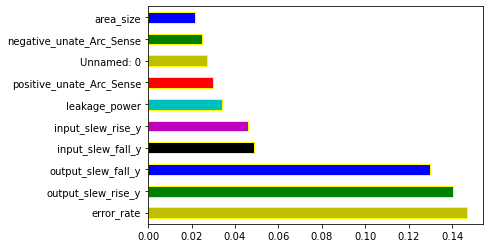

In [6]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color=list('ygbkmcr'),edgecolor='yellow')
plt.show()